In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generator
train_ds= keras.utils.image_dataset_from_directory(
     directory='/content/train',
     labels='inferred',
     label_mode= 'int',
     batch_size=32,
     image_size=(256,256)   #resizes the images as all the images are not the same shape
)

validation_ds= keras.utils.image_dataset_from_directory(
     directory='/content/test',
     labels='inferred',
     label_mode= 'int',
     batch_size=32,
     image_size=(256,256)   #resizes the images as all the images are not the same shape
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize

def process(image, label):
  image= tf.cast(image/255, tf.float32)
  return image,label

train_ds =train_ds.map(process)
validation_ds=validation_ds.map(process)

#MODEL

In [14]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [17]:
history= model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 87ms/step - accuracy: 0.5758 - loss: 2.4529 - val_accuracy: 0.6718 - val_loss: 0.6131
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 82ms/step - accuracy: 0.6963 - loss: 0.5758 - val_accuracy: 0.7400 - val_loss: 0.5671
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.7492 - loss: 0.5078 - val_accuracy: 0.7790 - val_loss: 0.4685
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.7991 - loss: 0.4309 - val_accuracy: 0.7538 - val_loss: 0.6233
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.8387 - loss: 0.3620 - val_accuracy: 0.7918 - val_loss: 0.5125
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8656 - loss: 0.3267 - val_accuracy: 0.7660 - val_loss: 0.5516
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9089 - loss: 0.2195 - val_accuracy: 0.8346 - val_loss: 0.4893
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9424 - loss: 0.1459 - 

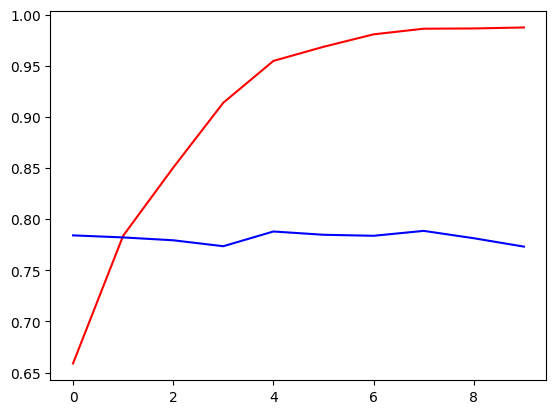

In [11]:
#accuracy grapghs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

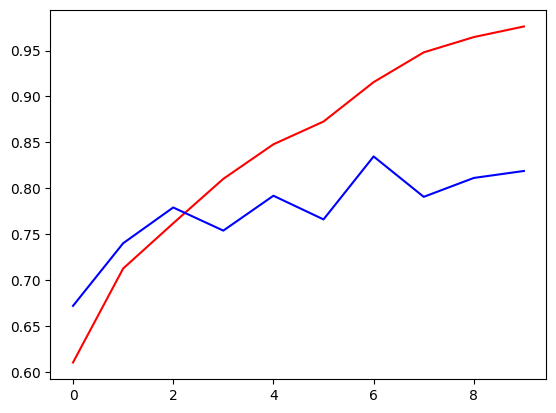

In [18]:
#accuracy grapgh after batch normalization and dropout layer

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

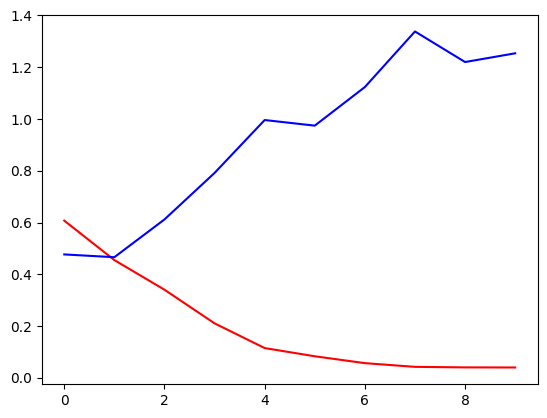

In [12]:
#loss graph

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')

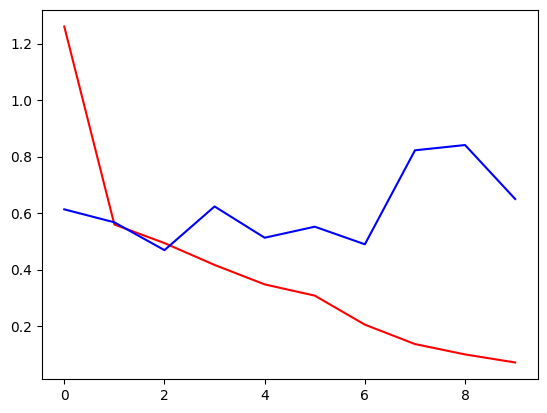

In [19]:
#loss graph after batch normalization and dropout layer
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')

# OVERFITTING!!!!! , thus batch normalization added and dropout layers

In [45]:
#predictions

import cv2

In [53]:
test_img=cv2.imread('/content/cat.png')

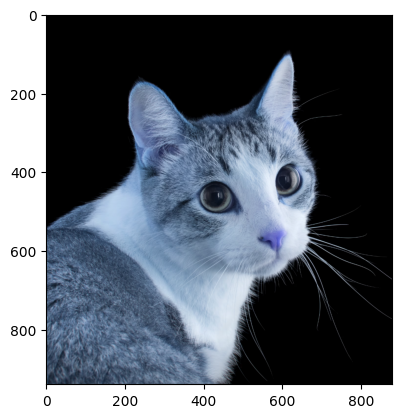

In [54]:
plt.imshow(test_img)

In [55]:
test_img.shape

(939, 879, 3)

In [56]:
#we need to resize
test_img= cv2.resize(test_img,(256,256))

In [57]:
test_img.shape

(256, 256, 3)

In [58]:
#since we pass data in batches using generators, we need to resize the batch to 1

test_input= test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

In [60]:
test_img= cv2.imread('/content/dog.png')

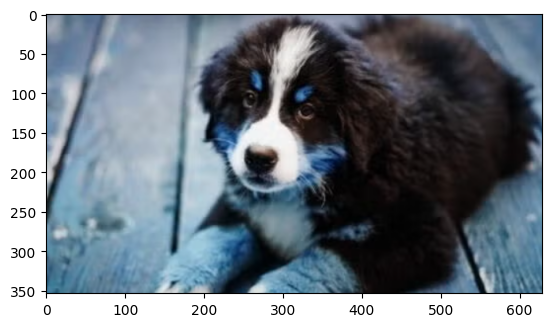

In [61]:
plt.imshow(test_img)

In [62]:
test_img.shape

(354, 629, 3)

In [63]:
test_img=cv2.resize(test_img, (256,256))

In [64]:
test_img.shape

(256, 256, 3)

In [65]:
test_input= test_img.reshape((1,256,256,3))

In [66]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)